# Count Vectorizer (variação do anterior)

## Comparando Técnicas de NLP: Stemming, Lemmatization e Stopwords

Este notebook avalia diferentes abordagens de pré-processamento de texto para classificação de documentos, comparando a performance de um classificador Naïve Bayes ao usar diferentes técnicas: **remoção de stopwords**, **lemmatização**, **stemming** e **tokenização simples**.

## 📌 O que foi feito
1. **Carregamento e preparação dos dados**:
   - Utilizamos o dataset `bbc_text_cls.csv`, que contém textos categorizados por tópicos.
   - Separação em treino e teste.
2. **Criação de representações textuais**:
   - Vetorização com `CountVectorizer`.
   - Aplicação de diferentes técnicas de pré-processamento:
     - **Sem stopwords** (CountVectorizer padrão)
     - **Removendo stopwords** (`stop_words='english'`)
     - **Lemmatização** (usando `WordNetLemmatizer`)
     - **Stemming** (usando `PorterStemmer`)
     - **Tokenização simples** (usando `split()`)
3. **Treinamento e avaliação do modelo**:
   - Classificação com Naïve Bayes (`MultinomialNB`).
   - Armazenamento dos resultados para cada técnica.
   - Comparação visual das performances.

## 📌 Dependências
- Python 3.x
- Pandas
- NumPy
- Scikit-learn
- NLTK


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [2]:
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Estela\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('bbc_text_cls.csv')
inputs = df['text']
labels = df['labels']

In [4]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

results = {}

In [5]:
def evaluate_model(name, vectorizer):
    Xtrain = vectorizer.fit_transform(inputs_train)
    Xtest = vectorizer.transform(inputs_test)
    model = MultinomialNB()
    model.fit(Xtrain, Ytrain)
    train_score = model.score(Xtrain, Ytrain)
    test_score = model.score(Xtest, Ytest)
    results[name] = {'train': train_score, 'test': test_score}
    print(f"{name} - Train Score: {train_score:.4f}, Test Score: {test_score:.4f}")

In [6]:
# Métodos de vetorização
evaluate_model("Sem pré-processamento", CountVectorizer())

Sem pré-processamento - Train Score: 0.9922, Test Score: 0.9713


In [7]:
evaluate_model("Removendo stopwords", CountVectorizer(stop_words='english'))

Removendo stopwords - Train Score: 0.9928, Test Score: 0.9767


In [8]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [9]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [10]:
evaluate_model("Lemmatização", CountVectorizer(tokenizer=LemmaTokenizer()))

C:\Users\Estela\anaconda3\envs\studies\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Lemmatização - Train Score: 0.9922, Test Score: 0.9677


In [11]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [12]:
evaluate_model("Stemming", CountVectorizer(tokenizer=StemTokenizer()))

C:\Users\Estela\anaconda3\envs\studies\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Stemming - Train Score: 0.9892, Test Score: 0.9695


In [13]:
def simple_tokenizer(s):
    return s.split()

In [14]:
evaluate_model("Tokenização simples", CountVectorizer(tokenizer=simple_tokenizer))

C:\Users\Estela\anaconda3\envs\studies\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Tokenização simples - Train Score: 0.9952, Test Score: 0.9713


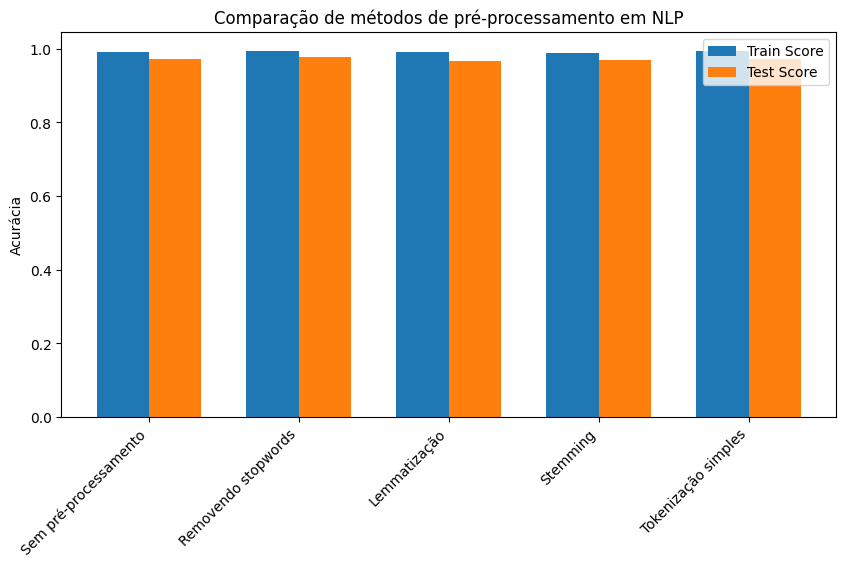

In [15]:
# Criando gráfico comparativo
labels = list(results.keys())
train_scores = [results[k]['train'] for k in labels]
test_scores = [results[k]['test'] for k in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Score')

ax.set_ylabel('Acurácia')
ax.set_title('Comparação de métodos de pré-processamento em NLP')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.show()